In [7]:
import tkinter as tk


In [8]:
from tkinter import filedialog

In [9]:
pip install brukeropusreader

Note: you may need to restart the kernel to use updated packages.


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import os
from brukeropusreader import read_file
from scipy.optimize import curve_fit
from scipy.integrate import simps

In [11]:
def open_file_and_plot():
    root = tk.Tk()
    root.withdraw()  # Hide the main window

In [12]:
    # Open file dialog and get the file path
    file_path = filedialog.askopenfilename()

In [13]:
  if file_path:
        # Reading the OPUS file
        opus_data = read_file(file_path)

In [14]:
   file_name = os.path.basename(file_path)

In [15]:
absorbance = opus_data['AB']

In [16]:

start_wn = opus_data['AB Data Parameter']['FXV']
end_wn = opus_data['AB Data Parameter']['LXV']
num_points = opus_data['AB Data Parameter']['NPT']

In [17]:
num_points = len(absorbance)

In [18]:
wavenumbers = np.linspace(start_wn, end_wn, num_points)

In [19]:
assert len(wavenumbers) == len(absorbance), "Wavenumbers and absorbance arrays must be the same length."


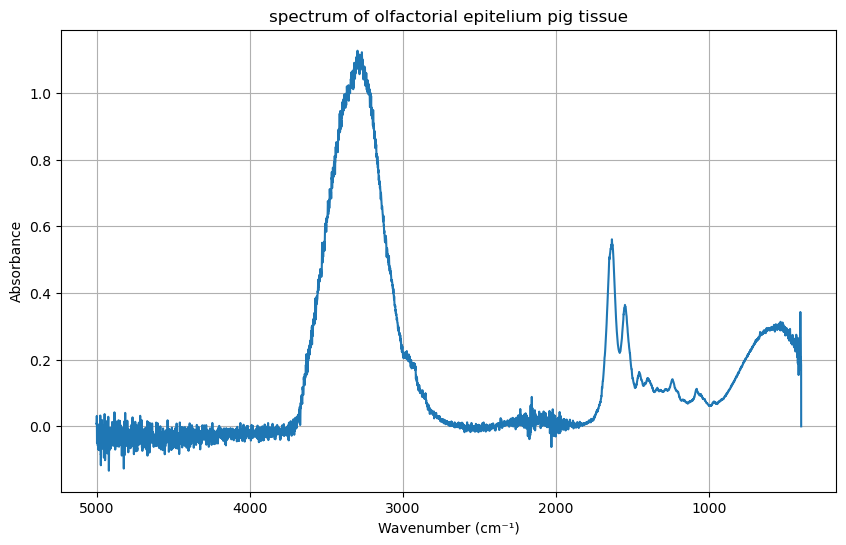

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(wavenumbers, absorbance)
plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Absorbance')
plt.title('spectrum of olfactorial epitelium pig tissue')  # Using the file name as the title
plt.grid(True)
plt.gca().invert_xaxis()  # Inverting the x-axis as wavenumbers typically decrease
plt.show()
open_file_and_plot()

In [21]:
# Restrict wavenumbers to the desired range
allowed_indices = np.where((wavenumbers >= 1600) & (wavenumbers <= 1700))[0]
wavenumbers_Amide1 = wavenumbers[allowed_indices]
absorbance_Amide1 = absorbance[allowed_indices]


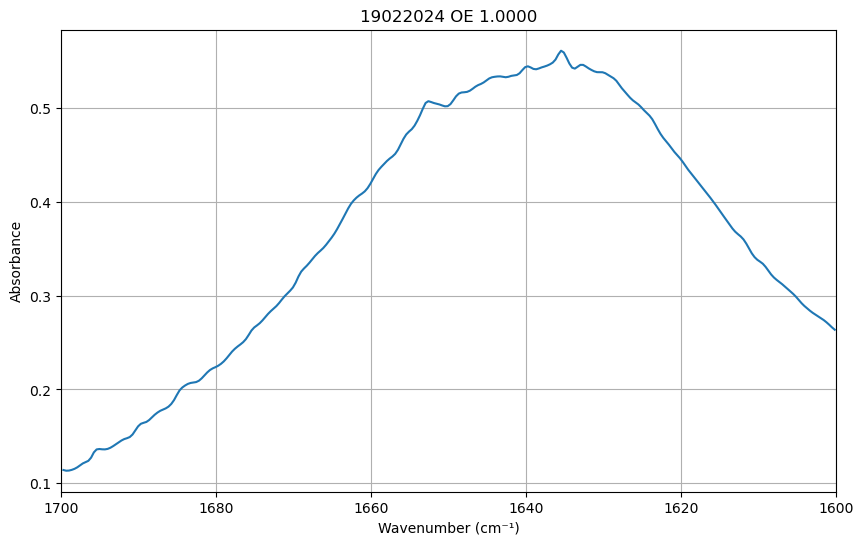

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(wavenumbers_Amide1, absorbance_Amide1)
plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Absorbance')
plt.title(file_name)  # Using the file name as the title
plt.grid(True)
plt.xlim(1700, 1600)  # Set x-axis limits for clarity
plt.show()

open_file_and_plot()


In [31]:
def gauss(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))
A_guess = max(absorbance_Amide1)
mu_guess = 1650
sigma_guess = 10

        # Fitting the data with a Gaussian function
popt, pcov = curve_fit(gauss, wavenumbers_Amide1, absorbance_Amide1, p0=[A_guess, mu_guess, sigma_guess])

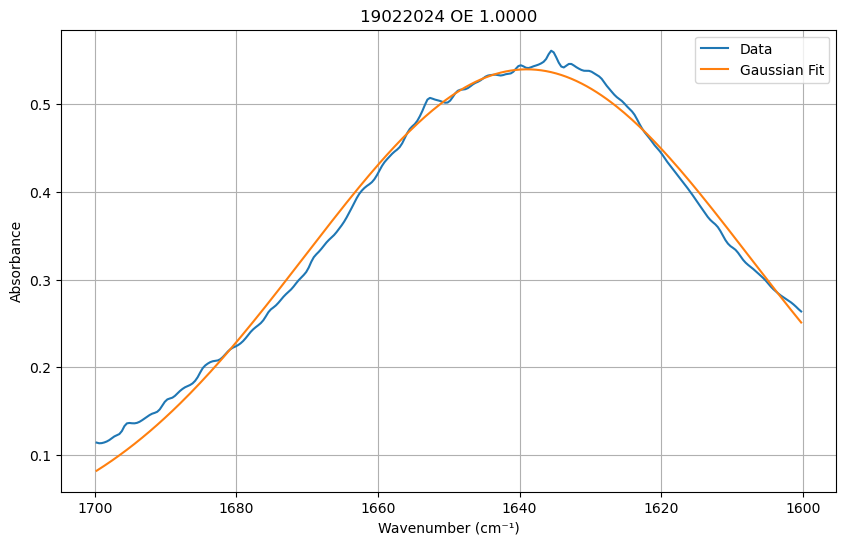

<function __main__.open_file_and_plot()>

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(wavenumbers_Amide1, absorbance_Amide1, label='Data')
plt.plot(wavenumbers_Amide1, gauss(wavenumbers_Amide1, *popt), label='Gaussian Fit')
plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Absorbance')
plt.title(file_name)  # Using the file name as the title
plt.grid(True)
plt.gca().invert_xaxis()  # Inverting the x-axis as wavenumbers typically decrease
plt.legend()
plt.show()

open_file_and_plot

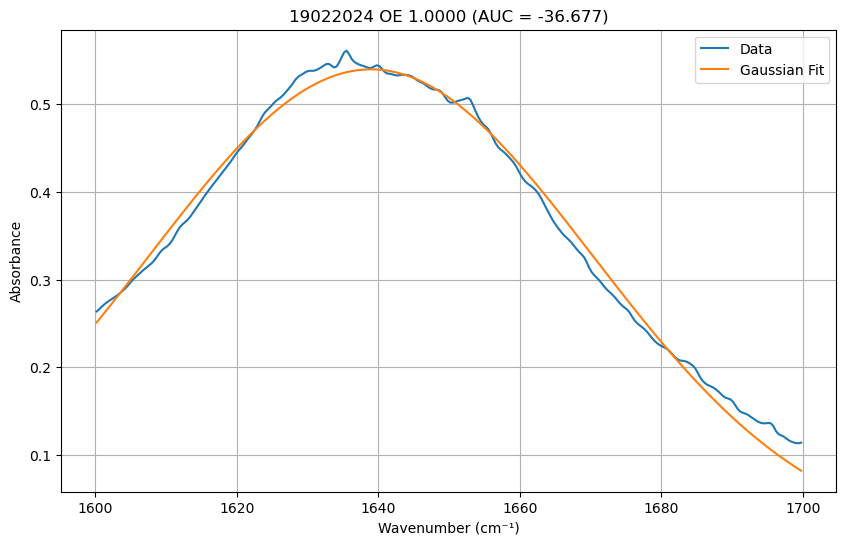

NameError: name 'open_file_and_plotc' is not defined

In [33]:
 # Calculate the area under the curve (AUC)
auc = simps(gauss(wavenumbers_Amide1, *popt), wavenumbers_Amide1)

        # Plot the data and the fitted curve
plt.figure(figsize=(10, 6))
plt.plot(wavenumbers_Amide1, absorbance_Amide1, label='Data')
plt.plot(wavenumbers_Amide1, gauss(wavenumbers_Amide1, *popt), label='Gaussian Fit')
plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Absorbance')
plt.title(f'{file_name} (AUC = {auc:.3f})')  # Add AUC to the title
plt.grid(True)
plt.legend()
plt.show()

open_file_and_plotc()